In [1]:
import os
import numpy as np 
import cv2 as cv2
import matplotlib.pyplot as plt

In [2]:


img = cv2.imread('D:\__Study__\CluseterTerm\Combined\\0002AA00162C.jpg')
# img = cv2.resize(img, (500, 500))


In [3]:
# Проверка на успешную загрузку изображения
if img is not None:
    # Получение размеров изображения
    height, width, channels = img.shape

    # Вывод информации
    print(f"Ширина: {width} пикселей")
    print(f"Высота: {height} пикселей")
    print(f"Количество каналов: {channels}")
else:
    print("Ошибка загрузки изображения.")

Ширина: 500 пикселей
Высота: 530 пикселей
Количество каналов: 3


In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Применение размытия для уменьшения шумов
blurred = cv2.medianBlur(gray, 5)

# Применение кругового преобразования Хафа
# circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=5, minDist=200, param1=50, param2=30, minRadius=70, maxRadius=106)
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=5, minDist=200, param1=50, param2=30, minRadius=70, maxRadius=109)


# Проверка, найдены ли круги
if circles is not None:
    circles = np.uint16(np.around(circles))
    # Список для хранения круговых ROI
    roi_list = []
    # Извлечение каждого кругового ROI
    for i, circle in enumerate(circles[0, :]):
        center_x, center_y, radius = circle[0], circle[1], circle[2]

        # Извлечение ROI с учетом радиуса
        roi = img[center_y - radius:center_y + radius, center_x - radius:center_x + radius]

        # Добавление кругового ROI в список
        roi_list.append(roi)
        # Сохранение каждого кругового ROI в отдельном файле
        cv2.imwrite(f'./Example_img/roi_{i+1}.jpg', roi)

    # Теперь вы можете использовать roi_list для дальнейшей обработки каждого круга
    for i, roi in enumerate(roi_list):
        # отобразить каждый круговой ROI
        height, width, channels = roi.shape
        print(roi.shape)

        print(f"Ширина: {width} пикселей")
        print(f"Высота: {height} пикселей")
        print(f"Количество каналов: {channels}")
        cv2.imshow(f'ROI {i+1}', roi)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
else:
    print("Круги не обнаружены.")

(212, 212, 3)
Ширина: 212 пикселей
Высота: 212 пикселей
Количество каналов: 3
(212, 212, 3)
Ширина: 212 пикселей
Высота: 212 пикселей
Количество каналов: 3
(212, 212, 3)
Ширина: 212 пикселей
Высота: 212 пикселей
Количество каналов: 3
(212, 212, 3)
Ширина: 212 пикселей
Высота: 212 пикселей
Количество каналов: 3


In [5]:
roi_list = np.array(roi_list)
roi_list.shape

(4, 212, 212, 3)

In [6]:
import cv2

# Вычислите абсолютную разницу между изображениями в оттенках серого
gray_roi_list_0 = cv2.cvtColor(roi_list[0], cv2.COLOR_BGR2GRAY)
gray_roi_list_3 = cv2.cvtColor(roi_list[3], cv2.COLOR_BGR2GRAY)
gray_diff1 = cv2.absdiff(gray_roi_list_0, gray_roi_list_3)
# Примените цветовую карту
heatmap = cv2.applyColorMap(gray_diff1, cv2.COLORMAP_JET)
cv2.imshow('1', gray_roi_list_0)
cv2.imshow('2', gray_roi_list_3)
cv2.imshow('3', roi_list[0])
cv2.imshow('4', roi_list[3])


# Визуализация асимметрии с использованием цветовой карты
cv2.imshow('Asymmetry Heatmap', heatmap)
# Визуализация абсолютной разницы в оттенках серого
cv2.imshow('Absolute Difference (Grayscale)', gray_diff1)
cv2.waitKey(0)
cv2.destroyAllWindows()


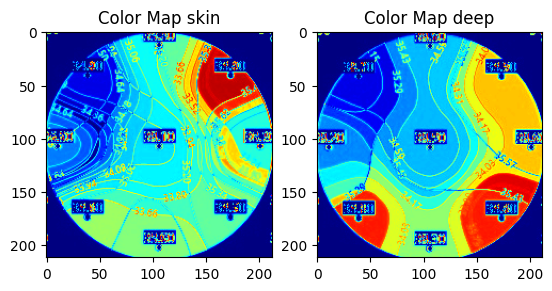

Минимальное значение разности: 0.0
Максимальное значение разности: 254.0
Среднее значение разности: 84.44749021003916


In [7]:
# Вычислите абсолютную разность между изображениями
diff1 = cv2.absdiff(roi_list[0], roi_list[3])

diff2 = cv2.absdiff(roi_list[1], roi_list[2])

cv2.imwrite(f'./Example_img/Module diff skin.jpg', diff1)
cv2.imwrite(f'./Example_img/Module diff deep.jpg', diff2)


# Визуализация результатов
cv2.imshow('absdiff skin', diff1)
cv2.imshow('absdiff deep', diff2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Преобразование в grayscale для создания цветовой карты
gray_diff1 = cv2.cvtColor(diff1, cv2.COLOR_BGR2GRAY)
gray_diff2 = cv2.cvtColor(diff2, cv2.COLOR_BGR2GRAY)

# Создание цветовой карты разности
heatmap1 = cv2.applyColorMap(gray_diff1, cv2.COLORMAP_JET)
heatmap2 = cv2.applyColorMap(gray_diff2, cv2.COLORMAP_JET)

# Сохранение результатов
cv2.imwrite('./Example_img/Color Map skin.jpg', heatmap1)
cv2.imwrite('./Example_img/Color Map deep.jpg', heatmap2)

# Визуализация результатов
plt.subplot(121), plt.imshow(cv2.cvtColor(heatmap1, cv2.COLOR_BGR2RGB)), plt.title('Color Map skin')
plt.subplot(122), plt.imshow(cv2.cvtColor(heatmap2, cv2.COLOR_BGR2RGB)), plt.title('Color Map deep')
plt.show()


# Получение статистики значений в изображении разности
min_val, max_val, _, _ = cv2.minMaxLoc(gray_diff1)
mean_val = cv2.mean(gray_diff1)[0]

print("Минимальное значение разности:", min_val)
print("Максимальное значение разности:", max_val)
print("Среднее значение разности:", mean_val)



In [8]:
# Вычитание с насыщением между roi_list[0] и roi_list[1]
diff1 = cv2.subtract(roi_list[3], roi_list[0])

# Вычитание с насыщением между roi_list[2] и roi_list[3]
diff2 = cv2.subtract(roi_list[2], roi_list[1])

cv2.imwrite(f'./Example_img/Saturation diff skin.jpg', diff1)
cv2.imwrite(f'./Example_img/Saturation diff deep.jpg', diff2)

# Визуализация результатов
cv2.imshow('saturation skin', diff1)
cv2.imshow('saturation deep', diff2)
cv2.waitKey(0)
cv2.destroyAllWindows()